<a href="https://colab.research.google.com/github/Mehmteren/MachineLearningExamples/blob/main/ML2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ad = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
import pandas as pd
ad = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


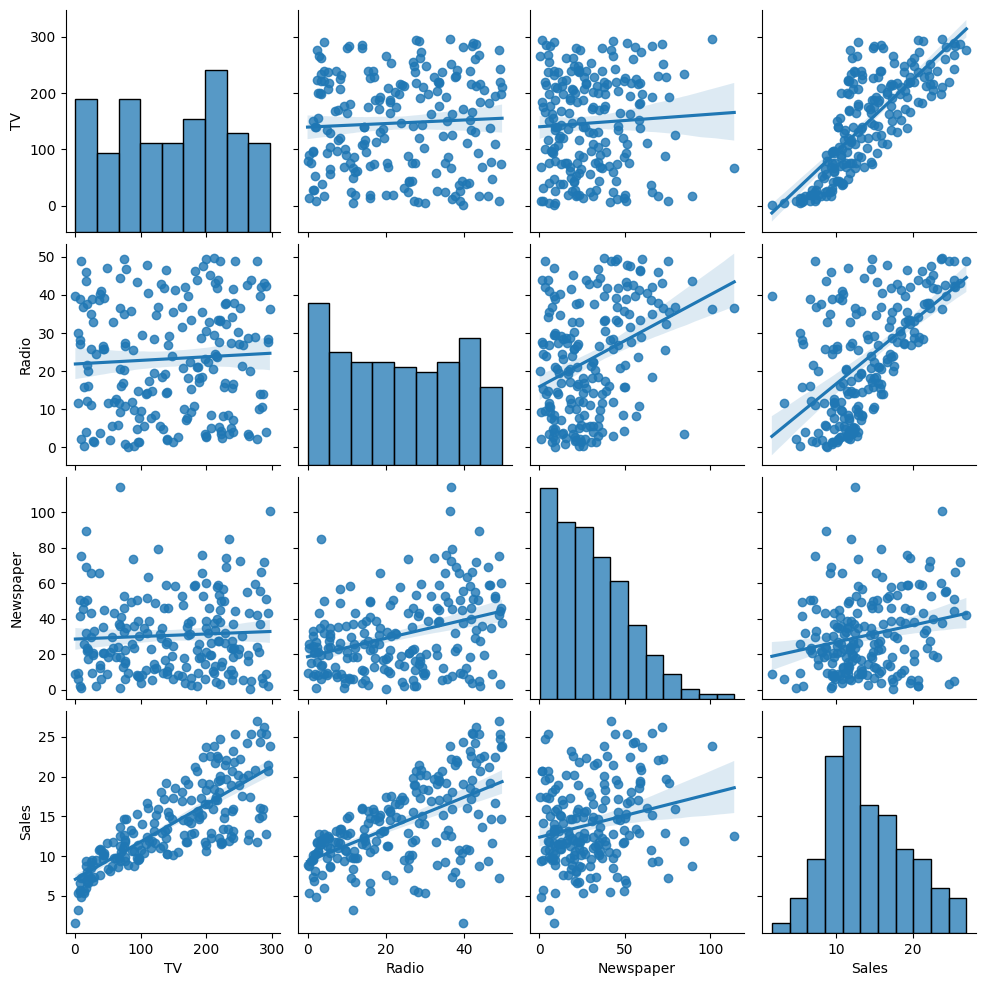

In [ ]:
import seaborn as sns
sns.pairplot(df, kind ="reg");

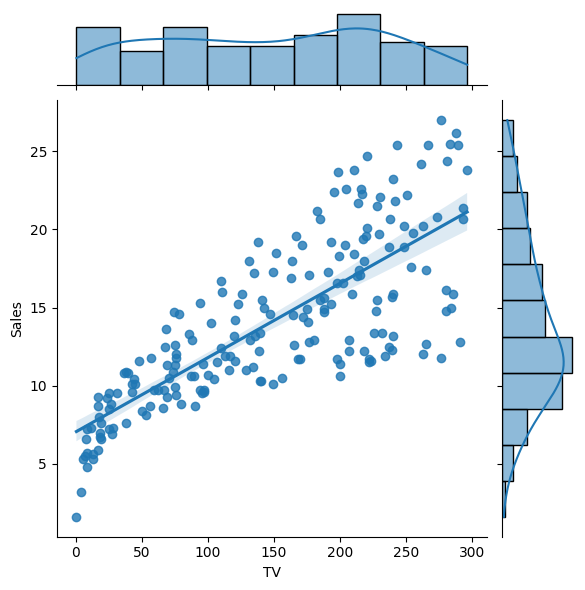

In [ ]:
sns.jointplot(x = "TV", y = "Sales", data = df, kind = "reg");

In [ ]:
# statsmodels ile modelleme

In [ ]:
import statsmodels.api as sm

x = df[["TV"]]
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
x = sm.add_constant(x)
x[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [ ]:
y = df["Sales"]

In [ ]:
y[0:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
lm = sm.OLS(y,x)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        13:08:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales ~ TV", data = df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        13:15:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.mse_model

3314.6181668686486

In [ ]:
model.rsquared_adj

0.6099148238341623

In [ ]:
model.fittedvalues[0:5]

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218


In [ ]:
y[0:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
("sales" + str("%.2f"% model.params[0] + "+ TV" + "*" + str("%.2f"% model.params[1])))

<ipython-input-35-d72782b81566>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ("sales" + str("%.2f"% model.params[0] + "+ TV" + "*" + str("%.2f"% model.params[1])))


'sales7.03+ TV*0.05'

In [ ]:
import matplotlib.pyplot as plt

(0.0, 28.27)

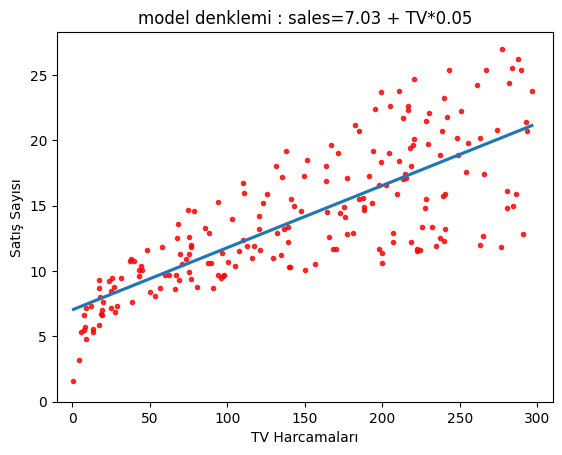

In [ ]:
g = sns.regplot(x='TV', y='Sales', data=df, ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title("model denklemi : sales=7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[['TV']]
y = df['Sales']
reg = LinearRegression()
model = reg.fit(x,y)
model.intercept_
model.coef_

array([0.04753664])

In [ ]:
model.score(x,y)

0.611875050850071

In [ ]:
model.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
# tahmin
#model denklemi  sales7.03+ TV*0.05

In [ ]:
7.03 + 30*0.04

8.23

In [ ]:
x = df[['TV']]
y = df['Sales']
reg = LinearRegression()
model = reg.fit(x,y)

In [ ]:
model.predict([[30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [ ]:
yeni_veri = [[5],[10],[15]]
model.predict(yeni_veri)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.27027675, 7.50795995, 7.74564316])

In [ ]:
# artıklar ve makine öğrenmesinin önemi

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lm = smf.ols("Sales ~ TV", df)
model = lm.fit()

In [ ]:
mse = mean_squared_error(y,model.fittedvalues)
mse

10.512652915656753

In [ ]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546883

In [ ]:
reg.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
y[0:10]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [ ]:
k_t = pd.DataFrame({"Gerçek_y": y[0:10],
                    "tahmin_y": reg.predict(x)[0:10]})
k_t.head()

,Gerçek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


In [ ]:
k_t["hata"] = k_t["Gerçek_y"] - k_t["tahmin_y"]
k_t.head()

,Gerçek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218


In [ ]:
k_t["hata_kare"] = k_t["hata"]**2
k_t.head()

,Gerçek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719


In [ ]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [ ]:
np.mean(k_t["hata_kare"])

9.290350329638102

In [ ]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [ ]:
model.resid[0:10]

,0
0,4.129225
1,1.252026
2,1.449776
3,4.265605
4,-2.727218
5,-0.246162
6,2.034050
7,0.453502
8,-2.641409
9,-5.930414


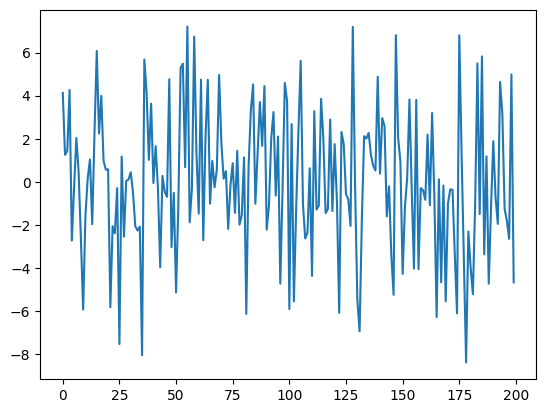

In [ ]:
plt.plot(model.resid)

In [ ]:
# ÇOKLU DOĞRUSAL REGRESYON

In [ ]:
import pandas as pd
ad = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [ ]:
x = df.drop("Sales", axis = 1)
y = df["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
x_train.shape

(160, 3)

In [ ]:
y_train.shape

(160,)

In [ ]:
x_test.shape

(40, 3)

In [ ]:
y_test.shape

(40,)

In [ ]:
training = df.copy()

In [ ]:
training.shape

(200, 4)

In [ ]:
# statsmodels

In [ ]:
lm = sm.OLS(y_train, x_train)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                   1.28e-137
Time:                        14:22:32   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
Radio          0.2188      0.011     20.138      0.000       0.197       0.240
Newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#scikit learn model

In [ ]:
lm = LinearRegression()

In [ ]:
model = lm.fit(x_train, y_train)

In [ ]:
model.intercept_

2.979067338122629

In [ ]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [ ]:
#tahmin

In [ ]:
yeni_veri = [[30],[10], [40]]

In [ ]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [ ]:
model.predict(yeni_veri)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

In [ ]:
rmse

1.644727765644337

In [ ]:
#modeltuning

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
x = df.drop("Sales", axis =1)
y = df["Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

1.644727765644337

In [ ]:
model.score(x_train, y_train)

0.8957008271017818

In [ ]:
cross_val_score(model, x_train, y_train, cv = 10 , scoring = "r2").mean()

0.7913548596916338

In [ ]:
-cross_val_score(model, x_train, y_train, cv = 10, scoring= "neg_mean_squared_error")

array([5.57303426, 2.86235681, 2.06504684, 1.09186983, 1.66159795,
       2.50694042, 2.92821679, 2.01207197, 7.2250041 , 1.66156243])

In [ ]:
np.sqrt(-cross_val_score(model,
                 x_train,
                 y_train,
                 cv = 10,
                 scoring= "neg_mean_squared_error")).mean()

2.9587701386797574

In [ ]:
np.sqrt(-cross_val_score(model,
                 x_test,
                 y_test,
                 cv = 10,
                 scoring= "neg_mean_squared_error")).mean()

1.6513523730313335

In [ ]:
# PCR MODEL TEMEL BİLEŞEN REGRESYONU

In [ ]:
hit = pd.read_csv("")

df.hit = hit.copy()
hit.head()